## Image classification with a convolutional neural network

This example is using the cifar10 dataset of keras (https://keras.io/datasets/). The dataset provides 50k training and 10k testing images of a small size and low resolution suitable for low performance environments. The images are in color and there are 10 target classes. Objective is to correctly predict as many images as possible with an convolutional neural network.

### Load the cifar10 dataset and explore the images

In [181]:
# Importing the necessary libraries
import keras
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
%matplotlib inline

In [182]:
# Load the preshuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

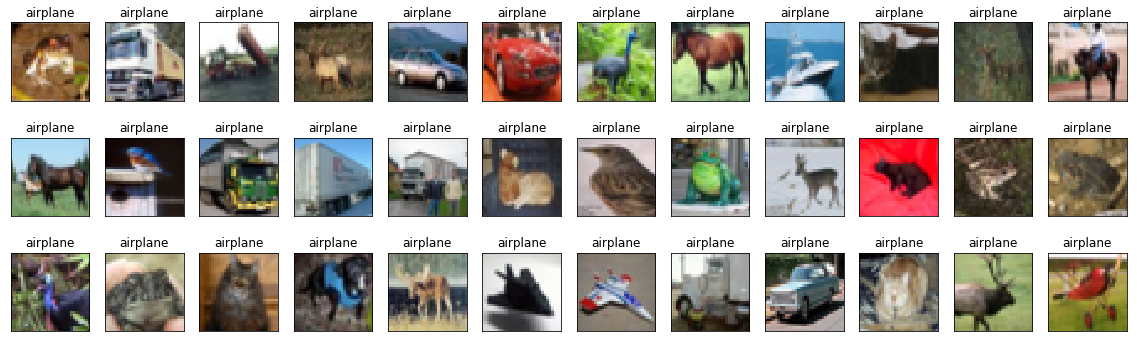

In [183]:
# Visualize some images and their labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig = plt.figure(figsize=(20, 6))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    true_idx = np.argmax(y_train[i])
    ax.set_title("%s" % cifar10_labels[true_idx])
    ax.imshow(np.squeeze(x_train[i]))

Every image consists of a 3-dimensional vector with the shape (32,32,3). The first two dimensions are corresponding to width and height of the image while the third dimension is holding the values of the three color channels.

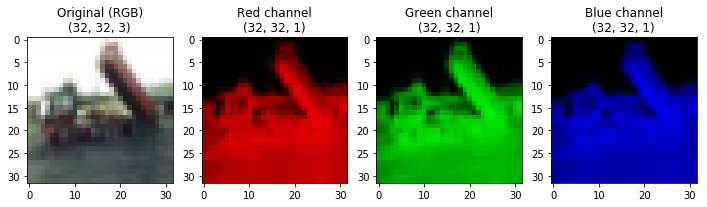

In [184]:
# Display the individual channels of a sample
fig, axes = plt.subplots(1, 4, figsize=(12, 10))
axes[0].imshow(x_train[2])
axes[0].set_title('Original (RGB)\n%s' % str(x_train[2].shape))

for i, l in zip(range(3), ['Red channel','Green channel','Blue channel']): 
    channel=np.zeros((32,32,3))
    channel[:,:,i] = x_train[2][:,:,i]
    axes[i+1].imshow(channel)
    axes[i+1].set_title('%s\n(32, 32, 1)' % (l))
plt.show()

In [185]:
# Normalize the three color values from 0-255 to 0-1
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [186]:
# Encode the labels into categorical values (one-hot encoding)
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### TODO: Define the architecture for the convolutional neural network

TODO: You have to define the architecture of the layers. You will need convolutional layers (https://keras.io/layers/convolutional/#conv2d) to preserve spatial information of the pixels. Some hints are:
* Stick with the sequential model, there is not temporal information here
* It is advised to follow a convolutional layer (Conv2D) by a pooling layer (MaxPooling2D)
* If your accuracy is good but your validation accuracy is not, try to prevent overfitting by adding a dropout (https://keras.io/layers/core/#dropout)
* To rectifier linear unit (ReLU) has proven to be a good start for the activation of layers in networks (https://keras.io/activations/#available-activations)
* Because you try to predict multiple classes, the final layer needs to be a dense layer with the number of classes as neurons and a softmax activation function

In [190]:
# TODO: Define the architecture for the neural network
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

In [191]:
# Print summary of the model to examine parameters to train
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 4, 4, 64)          0         
__________

In [193]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

In [194]:
from keras.callbacks import ModelCheckpoint   
import livelossplot as lp

plot_learning = lp.PlotLossesKeras()

# train the model
checkpointer = ModelCheckpoint(filepath='image.model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)

callbacks = [checkpointer, plot_learning]

TODO: In the next cell you should train (fit) your network. Try do experiment with different values for the *batch_size* and *epochs* parameters.

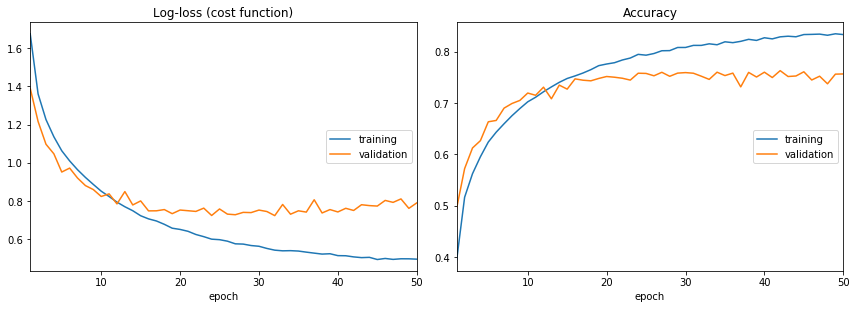

In [195]:
# TODO: Fit the model by calling the fit method and supply the necessary
# parameters including the validation data
hist = model.fit(x_train, y_train, batch_size=100, epochs=50,
          validation_data=(x_valid, y_valid), callbacks=callbacks, 
          verbose=1)

If you have trained your model you can load the weights and evaluate your model by executing the following cell. You do not have to change any code.

In [196]:
# Load the weights that yielded the best validation accuracy
model.load_weights('image.model.weights.best.hdf5')

# Evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7469


If you are satisfied with the accuracy of your model you can use it to make the predictions on the test and visualize some samples by executing the next cell.

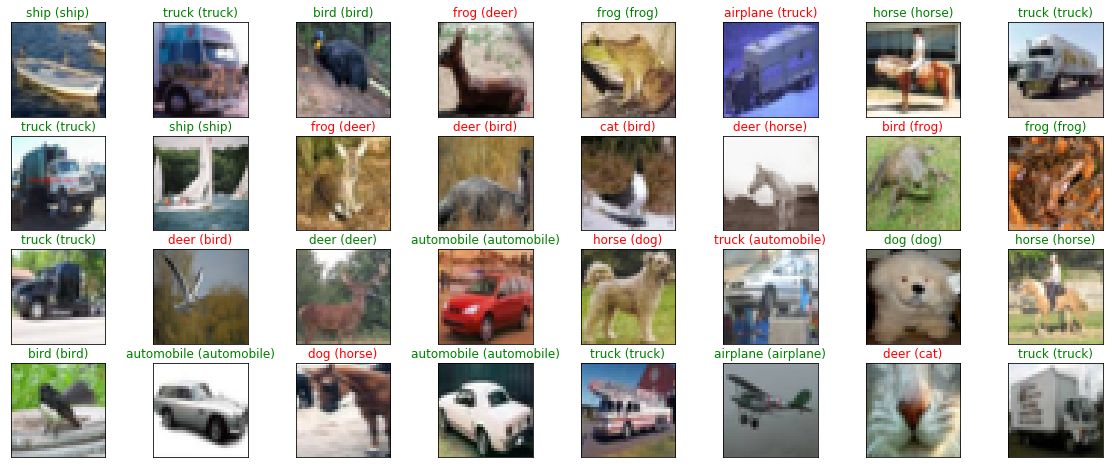

In [197]:
# Make the predictions on the test set
y_hat = model.predict(x_test)

# Plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

Congratulations! How did you do with the classification of the images? Did you get an accuracy of .7 and more?